# Q-Learning Experiments

This notebook evaluates the Q-Learning agent on the TestEnv environment.
We analyze convergence, cumulative reward, and policy stability under
different hyperparameter settings. <br>

All algoritm code is implemented in `src/models/Qlearning.py`. <br>
This notebook only shows the direct implementation of an experiment and analysis of the results.

In [6]:
#We import the necessary libraries and modules
from src.models.Qlearning import QAgent, number_of_actions_env_wrapper
from src.env.TestEnv import HydroElectric_Test
from src.utils.visualizations import *
import numpy as np
import random

In [7]:
#We set a random seed for reproducibility
SEED = 5
np.random.seed(SEED)

In [8]:
#We set the experiment configurations
AGENT_CONFIG = {
    "discount_rate": 0.99,
}

TRAIN_CONFIG = {
    "learning_rate": 0.1,
    "simulations" : 20,
    "epsilon": 0.6,
    "epsilon_decay": 0.995,
    "adaptive_epsilon" : True,
    "adaptive_learning_rate" : True,
    "use_reward_shaping": True,
}

In [9]:
#We initialize the environment and the agent
env = HydroElectric_Test("data/train.xlsx")
validate_env = HydroElectric_Test("data/validate.xlsx")

#We select one of the wrappers
env = number_of_actions_env_wrapper(env,5)
validate_env = number_of_actions_env_wrapper(validate_env, num_actions=5)

env.reset(seed=SEED)
agent = QAgent(env, **AGENT_CONFIG)


In [10]:
# We train the agent with specified parameters
agent.train(**TRAIN_CONFIG)


0 -660952.1986267704
5 -39821.76755820791
mean reward -1.51 min reward -4596.64 max reward 662.63 max total reward -39821.77
10 -3064.226093196521
mean reward -0.12 min reward -331.8 max reward 1019.5 max total reward -3064.23
15 -4004.74812852921
mean reward -0.15 min reward -366.98 max reward 1019.5 max total reward 3018.02


In [11]:
# We replace the environment with the validation environment and let the agent play once
agent.env = validate_env
agent.env.reset()
water_levels, rewards, action_history = agent.play()


Total reward in evaluation: -4570.53
avg reward -0.26
max 186.73349938668002 min -113.765434762275


### Model performance
We visualize the performance of the model using multiple visualizations. 
Specifically, we have functions for the water level:
- `plot_water_levels()`: Simple time series of water level
- `plot_daily_statistics()`: Water level time series with min, max and range

Functions for the actions:
- `plot_actions_over_time()`: Simple time series of actions
- `plot_action_distribution()`: Distribution of actions performed

Functions for the rewards:
- `plot_cumulative_rewards()`: Simple time series of rewards over time from test simulation
- `plot_reward_distribution()`: Distribution of rewards from test simulation

Functions for the Qtable:
- `plot_state_heatmap()`: Heatmap of Qtable

Functions for learning curve for training:
- `plot_learning_curve()`: learning curve through training

If you want to summarize the results in a single plot, you can use:
- `create_performance_dashboard()`: Action and environment summary
- `plot_learning_curve_with_phases()`: Learning summary



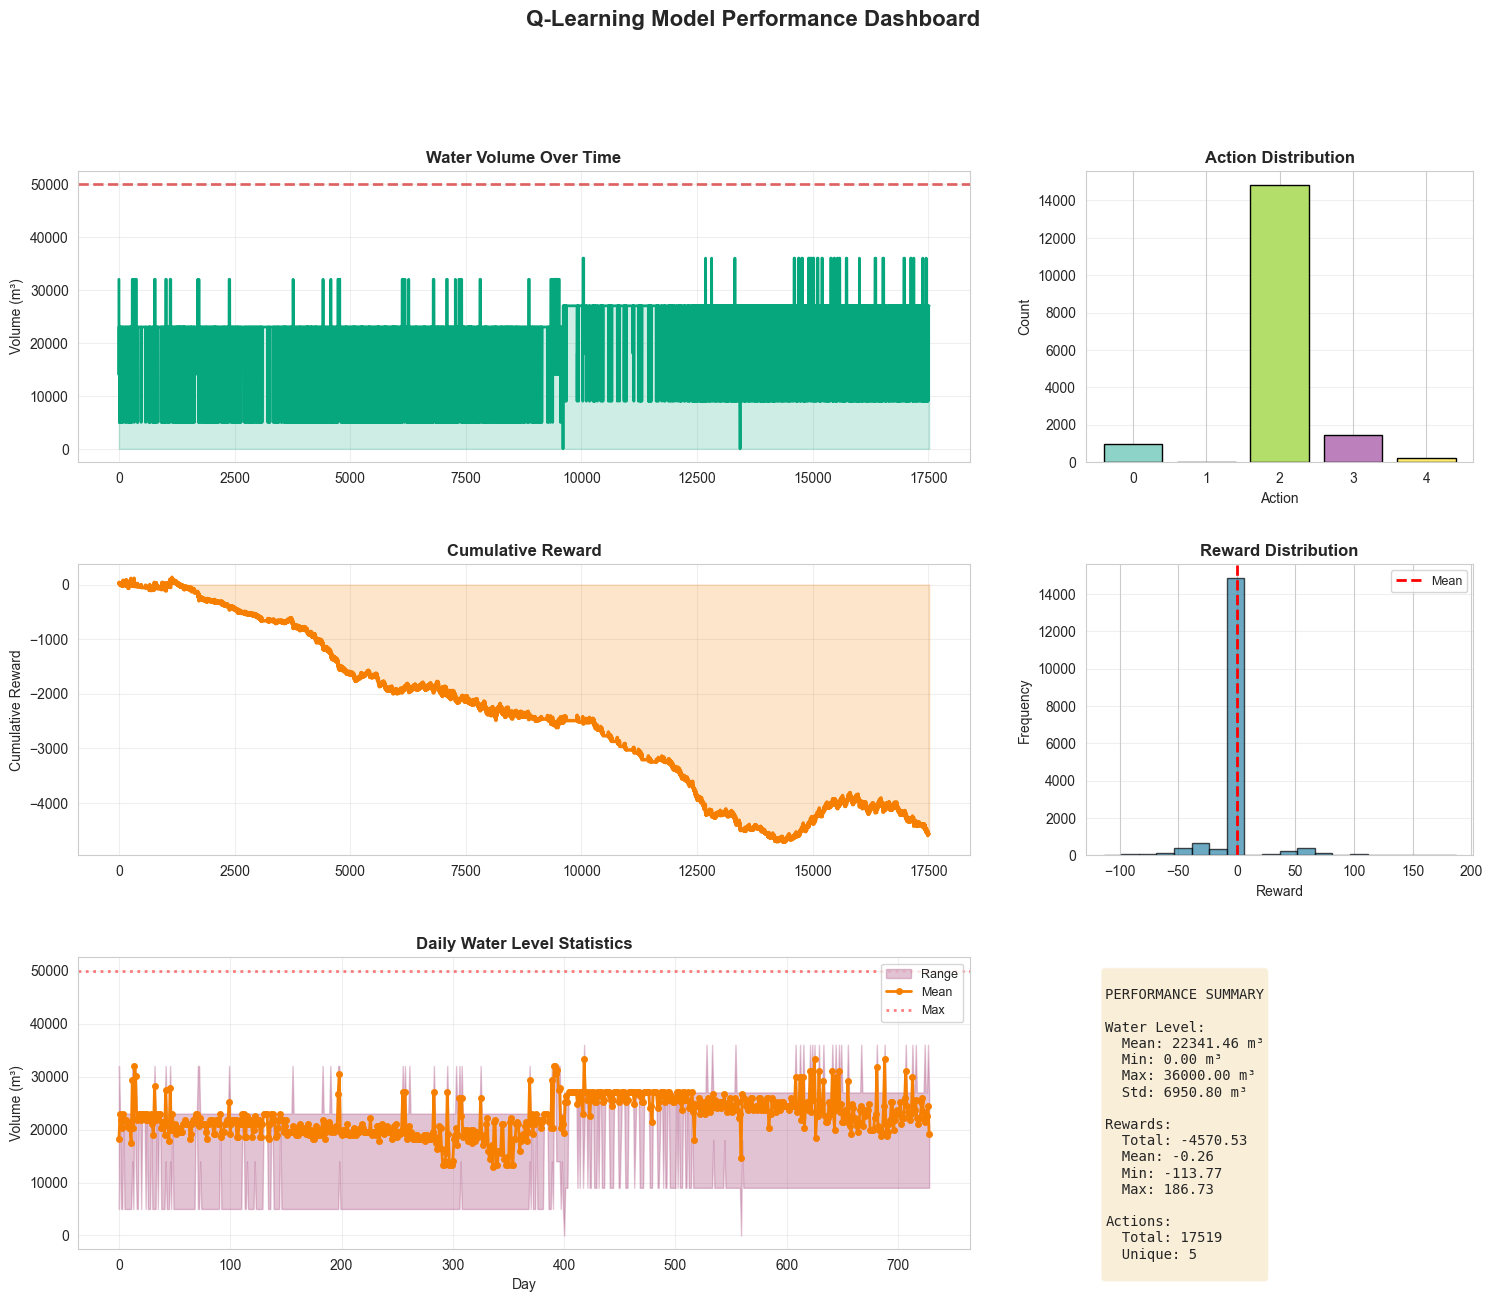

In [12]:
create_performance_dashboard(water_levels, rewards, action_history, max_volume = 50000)

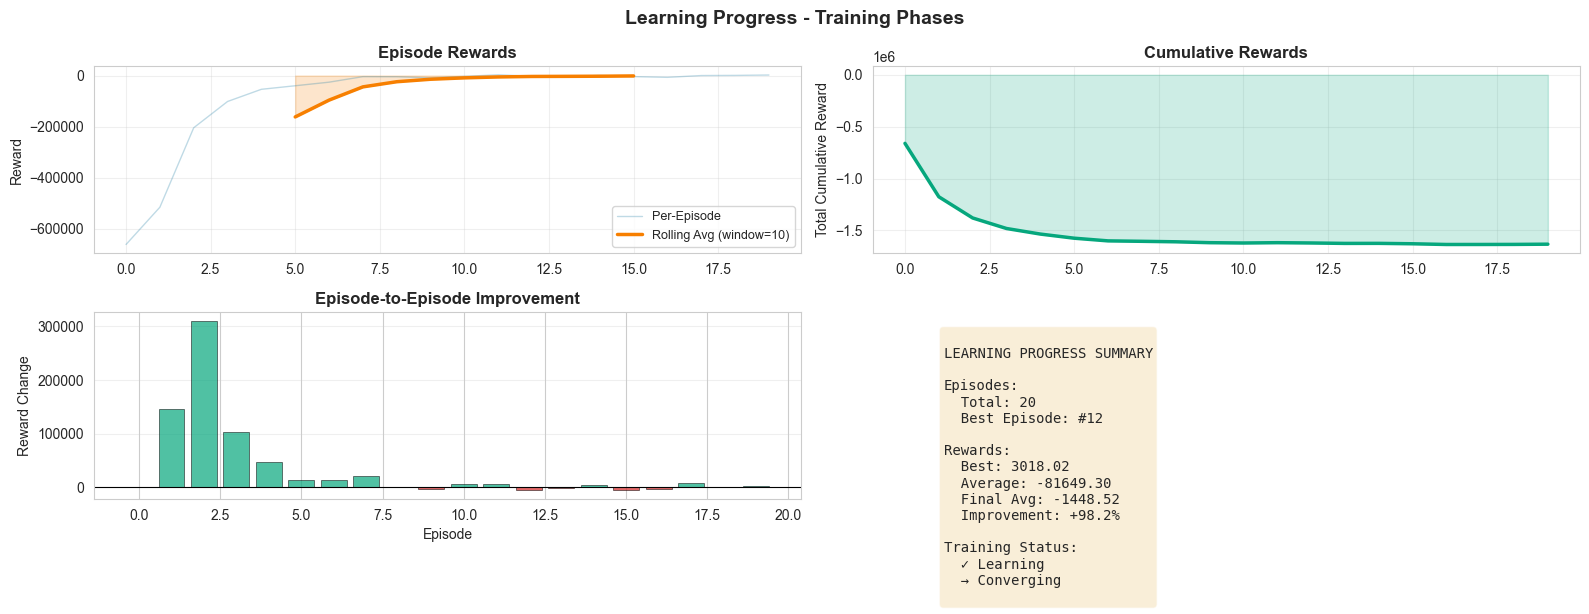

In [13]:
import pandas as pd
plot_learning_curve_with_phases(agent.train_curve)

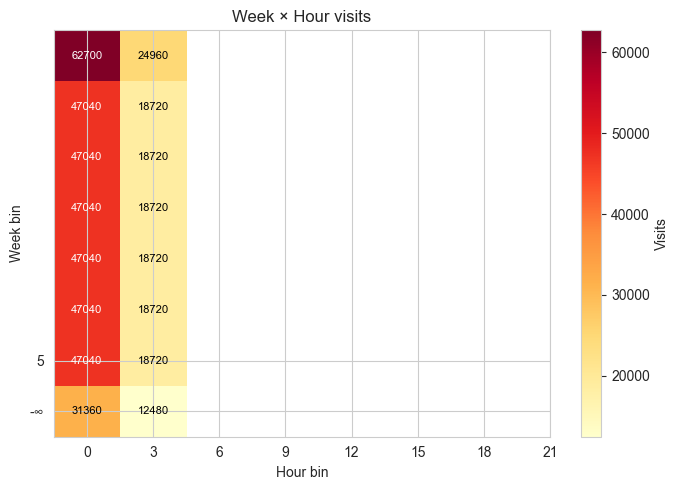

In [15]:
plot_state_heatmap(agent, "Week", "Hour")

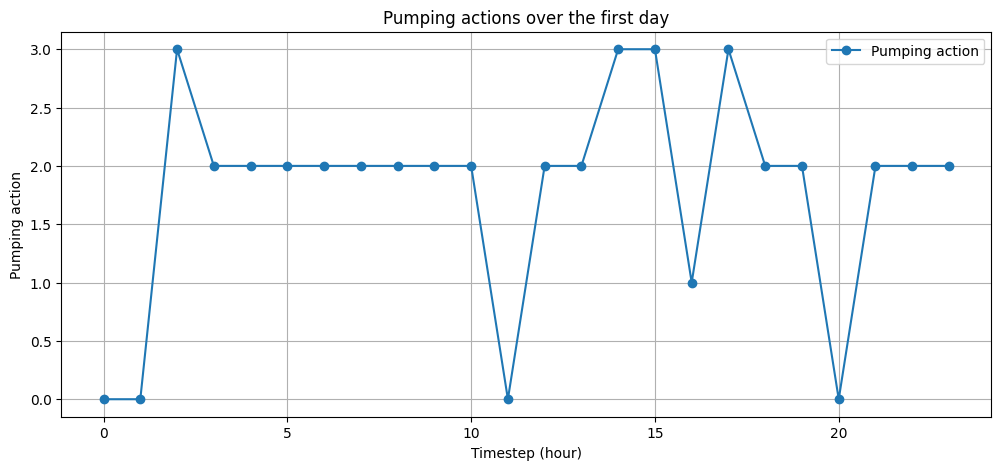

In [22]:
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
actions = action_history[:24] # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(actions, marker='o')
plt.title("Pumping actions over the first day")
plt.xlabel("Timestep (hour)")
plt.ylabel("Pumping action")
plt.legend(["Pumping action"])
plt.grid(True)
plt.show()

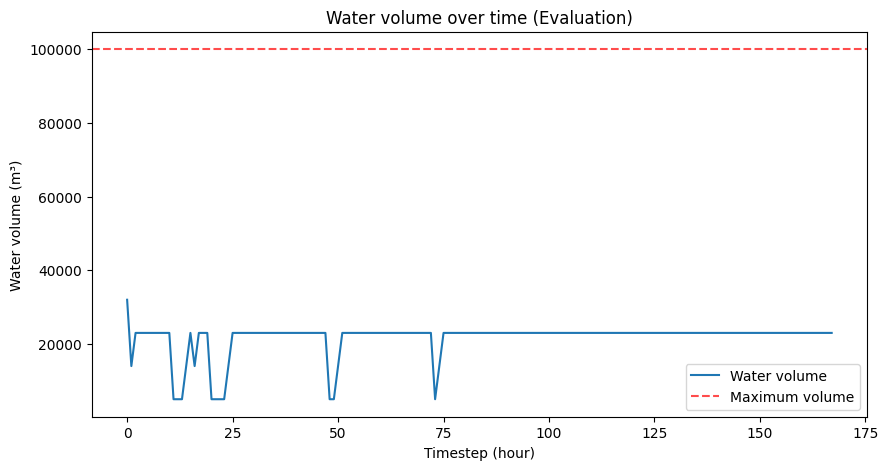

In [23]:
# Plot waterniveau over tijd
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(water_levels[:24*7])  # eerste 7 dagen, 24 uur per dag
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
plt.title("Water volume over time (Evaluation)")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.legend(["Water volume", "Maximum volume"])
plt.show()


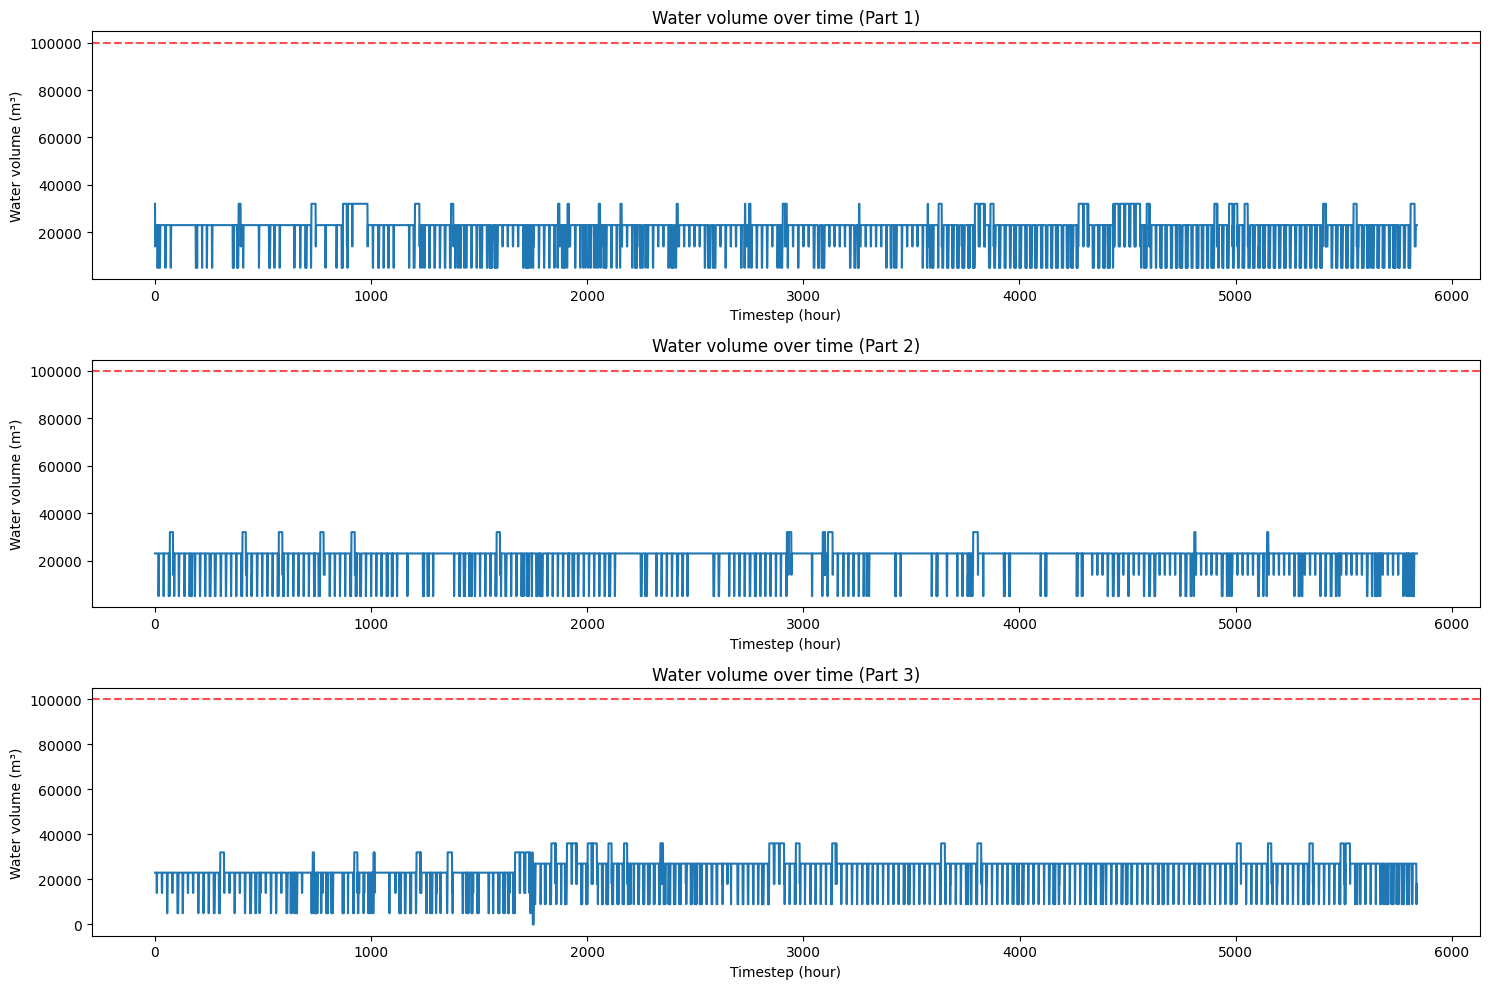

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Stel: water_levels bevat alle uren over 3 jaar
# en env.max_volume is de maximale waterhoeveelheid

# Aantal plots
n_plots = 3

# Verdeel de data in n_plots stukken
chunks = np.array_split(water_levels, n_plots)

plt.figure(figsize=(15,10))

for i, chunk in enumerate(chunks, 1):
    plt.subplot(n_plots, 1, i)
    plt.plot(chunk)
    plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
    plt.title(f"Water volume over time (Part {i})")
    plt.xlabel("Timestep (hour)")
    plt.ylabel("Water volume (m³)")

plt.tight_layout()
plt.show()


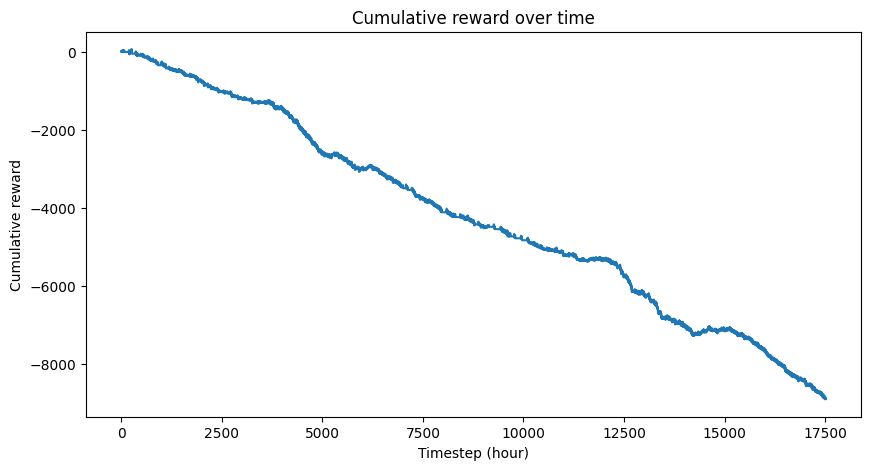

In [25]:
# Plot cumulatieve reward
%matplotlib inline
cumulative_rewards = np.cumsum(rewards)
plt.figure(figsize=(10,5))
plt.plot(cumulative_rewards)
plt.title("Cumulative reward over time")
plt.xlabel("Timestep (hour)")
plt.ylabel("Cumulative reward")
plt.show()

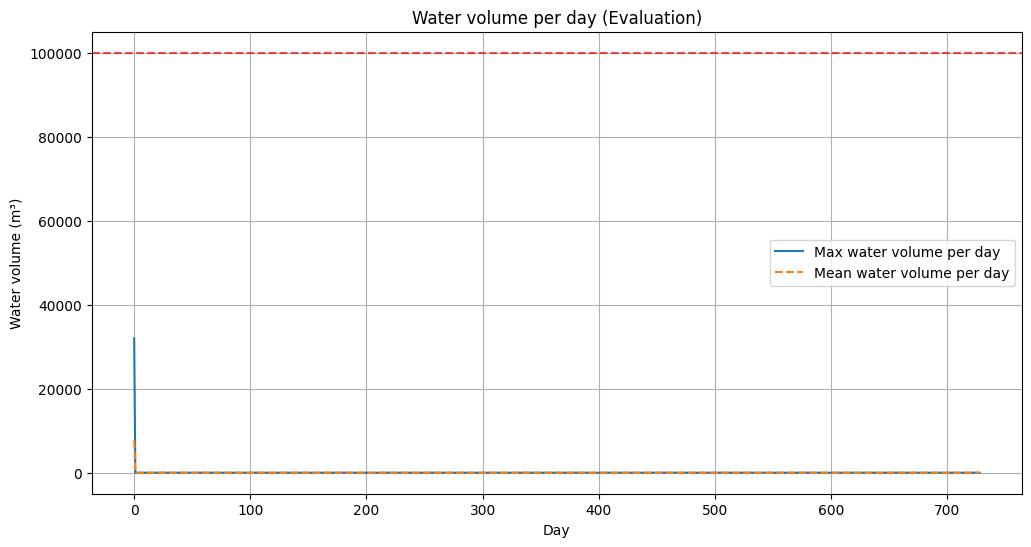

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Water levels per dag (max of gemiddeld)
hours_per_day = 24
num_days = len(water_levels) // hours_per_day

# Max waterniveau per dag
daily_max = [max(water_levels[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]
# Gemiddeld waterniveau per dag
daily_avg = [np.mean(water_levels[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]

plt.figure(figsize=(12,6))
plt.plot(daily_max, label='Max water volume per day')
plt.plot(daily_avg, label='Mean water volume per day', linestyle='--')
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7)
plt.title("Water volume per day (Evaluation)")
plt.xlabel("Day")
plt.ylabel("Water volume (m³)")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
# # Cumulatieve reward per dag
# daily_rewards = [sum(rewards[i*hours_per_day:(i+1)*hours_per_day]) for i in range(num_days)]
# cumulative_daily_rewards = np.cumsum(daily_rewards)

# plt.figure(figsize=(12,6))
# plt.plot(cumulative_daily_rewards)
# plt.title("Cumulative reward per day")
# plt.xlabel("Day")
# plt.ylabel("Cumulative reward")
# plt.grid(True)
# plt.show()


Waarschuwing: aantal uren niet deelbaar door 24, laatste incomplete dag wordt genegeerd


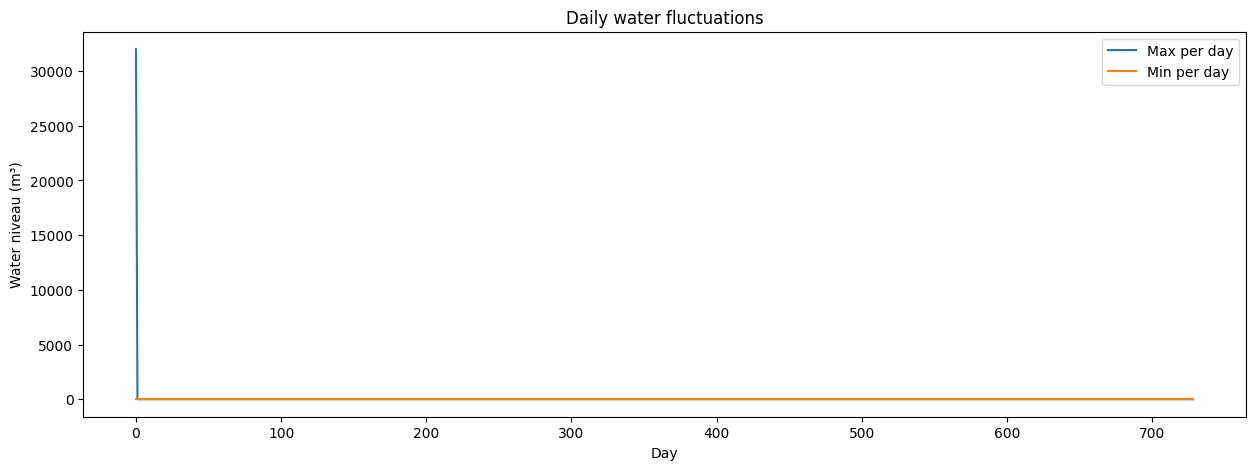

In [34]:
water_levels = np.array(water_levels)  # zet om naar NumPy array

# Controleer of het aantal uren deelbaar is door 24
if len(water_levels) % 24 != 0:
    print("Waarschuwing: aantal uren niet deelbaar door 24, laatste incomplete dag wordt genegeerd")
    water_levels = water_levels[:-(len(water_levels) % 24)]

# Bereken max en min per dag
daily_max = water_levels.reshape(-1, 24).max(axis=1)
daily_min = water_levels.reshape(-1, 24).min(axis=1)

# Plotten
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(daily_max, label="Max per day")
plt.plot(daily_min, label="Min per day")
plt.legend()
plt.title("Daily water fluctuations")
plt.xlabel("Day")
plt.ylabel("Water niveau (m³)")
plt.show()


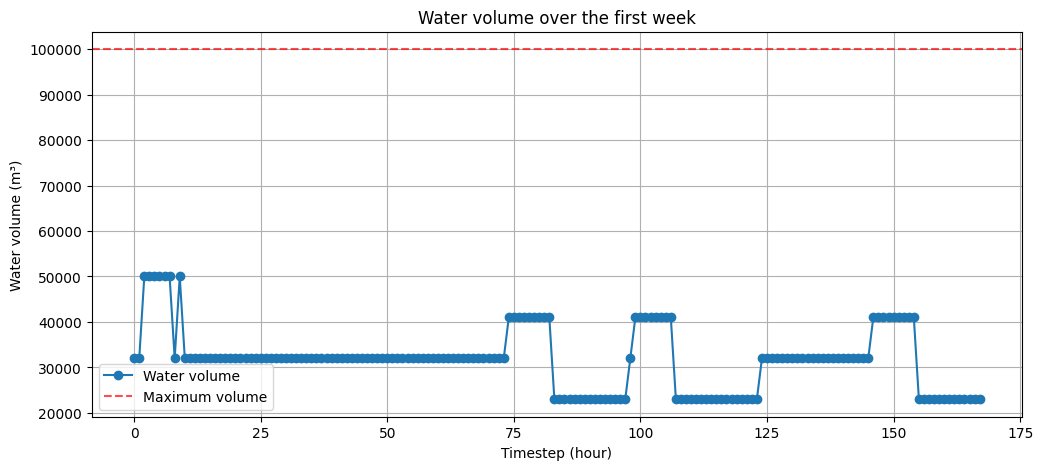

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# Zorg dat je water_levels al hebt van agent.play()
first_week = water_levels[:24*7]  # eerste 7 dagen, 24 uur per dag

plt.figure(figsize=(12,5))
plt.plot(first_week, marker='o')
plt.title("Water volume over the first week")
plt.xlabel("Timestep (hour)")
plt.ylabel("Water volume (m³)")
plt.axhline(env.max_volume, color='r', linestyle='--', alpha=0.7, label="Max volume")
plt.legend(["Water volume", "Maximum volume"])
plt.grid(True)
plt.show()


In [38]:
def plot_state_heatmap(agent, dim_x, dim_y):
    """
    dim_x, dim_y: strings, één van:
        "Volume", "Price", "Hour", "Week", "Month"
    """

    import numpy as np
    import matplotlib.pyplot as plt

    # 1. Mapping van naam → index in state_visits
    dim_map = {
        "Volume": 0,
        "Price": 1,
        "Hour": 2,
        "Week": 3,
        "Month": 4
    }

    # 2. Bins per dimensie
    bins_map = {
        "Volume": agent.volume_bins[:-1],
        "Price": agent.price_bins[:-1],
        "Hour": agent.hour_bins[:-1],
        "Week": agent.week_bins[:-1],
        "Month": agent.month_bins[:-1]
    }

    ix = dim_map[dim_x]
    iy = dim_map[dim_y]

    # 3. Alle dimensies behalve x en y weg-summen
    all_dims = {0, 1, 2, 3, 4}
    axes_to_sum = tuple(all_dims - {ix, iy})

    heatmap = agent.state_visits.sum(axis=axes_to_sum)

    # 4. Plotten met correcte kleuren
    plt.figure(figsize=(7, 5))

    im = plt.imshow(
        heatmap,
        origin="lower",
        aspect="auto",
        cmap="YlOrRd"  # 🔥 goede heatmap-kleuren
    )

    plt.colorbar(im, label="Visits")
    plt.title(f"{dim_x} × {dim_y} visits")
    plt.xlabel(f"{dim_y} bin")
    plt.ylabel(f"{dim_x} bin")

    # 5. Labels veilig formatteren (±inf)
    def format_bin(b):
        if np.isneginf(b):
            return "-∞"
        if np.isposinf(b):
            return "∞"
        return str(int(b))

    xbins = bins_map[dim_y]
    ybins = bins_map[dim_x]

    plt.xticks(
        ticks=np.arange(len(xbins)),
        labels=[format_bin(b) for b in xbins]
    )
    plt.yticks(
        ticks=np.arange(len(ybins)),
        labels=[format_bin(b) for b in ybins]
    )

    # 6. Getallen in de heatmap (kleur afhankelijk van intensiteit)
    max_val = heatmap.max() if heatmap.max() > 0 else 1

    for i in range(heatmap.shape[0]):
        for j in range(heatmap.shape[1]):
            value = int(heatmap[i, j])
            text_color = "white" if value > 0.6 * max_val else "black"

            plt.text(
                j, i, str(value),
                ha='center', va='center',
                fontsize=8,
                color=text_color
            )

    plt.tight_layout()
    plt.show()


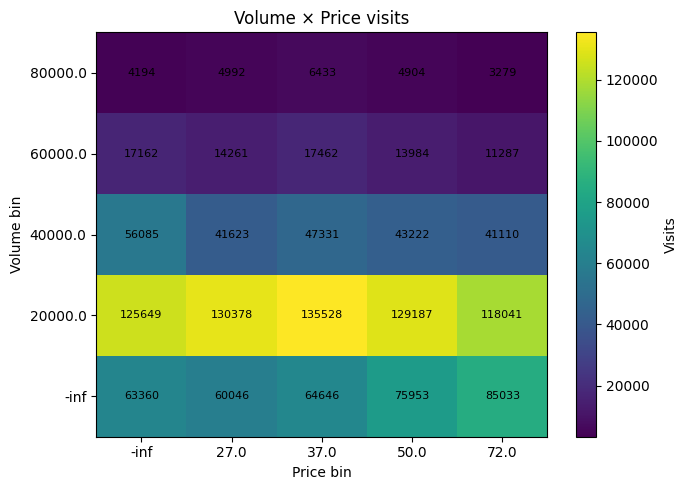

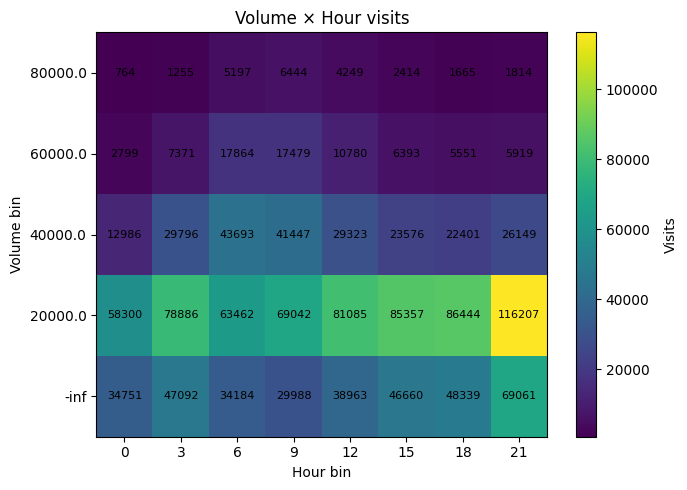

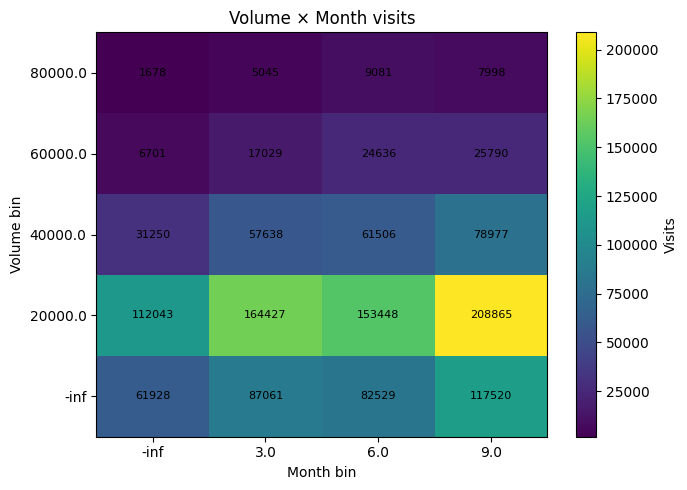

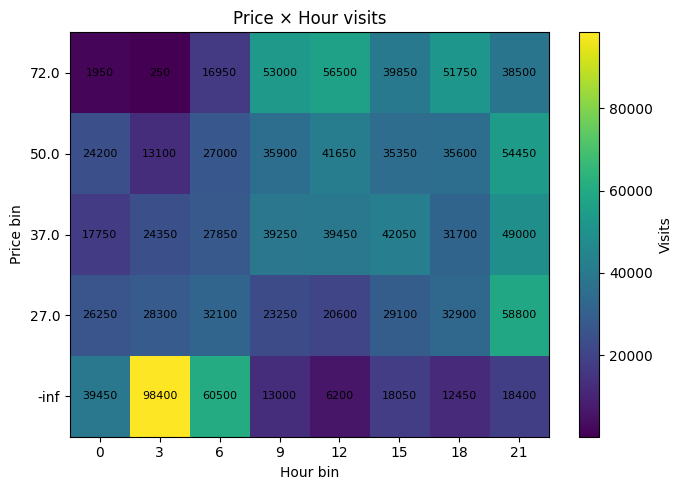

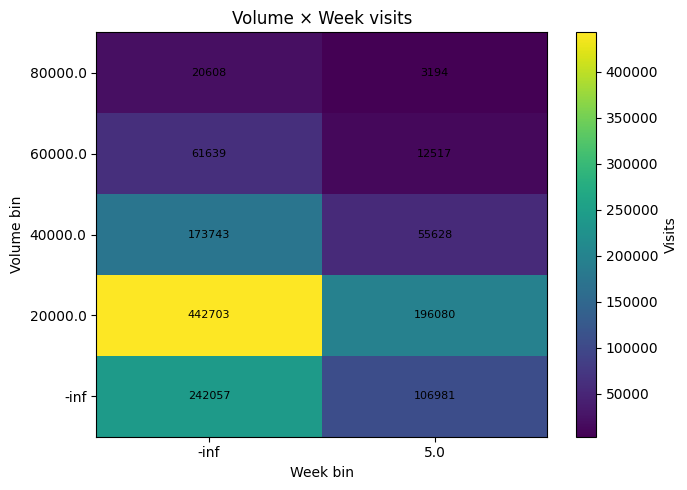

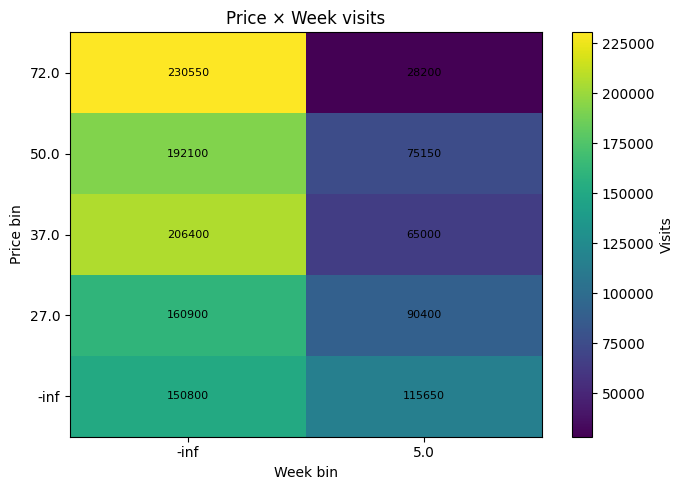

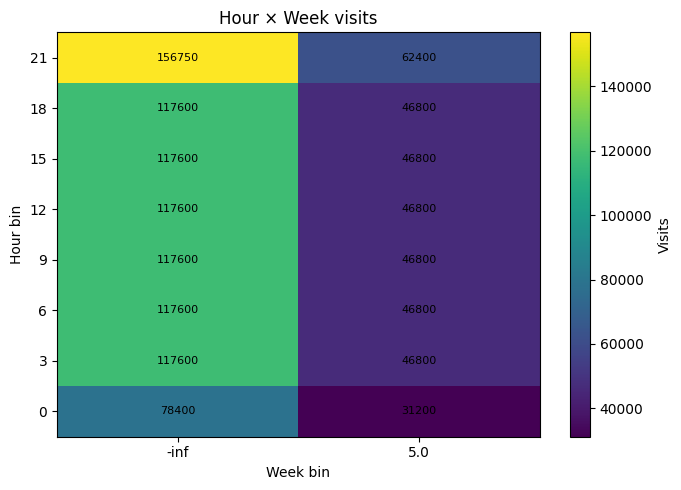

In [17]:
logical_pairs = [ ("Volume", "Price"), ("Volume", "Hour"), ("Volume", "Month"), ("Price", "Hour"), ("Volume", "Week"), ("Price", "Week"), ("Hour", "Week") ]
for i,j in logical_pairs:
    plot_state_heatmap(agent, i, j)


In [18]:
#old heatmap 
# visits_price_hour = agent.state_visits.sum(axis=0)  # sum over volume

# plt.figure(figsize=(10,4))
# plt.imshow(visits_price_hour.T, origin="lower", aspect="auto")
# plt.colorbar(label="Number of visits")

# for (y, x), value in np.ndenumerate(visits_price_hour.T):
#     plt.text(x, y, int(value), ha="center", va="center", color="white", fontsize=7)

# plt.xlabel("Price bin")
# plt.ylabel("Hour of day")
# plt.title("State visit heatmap (Price vs Hour)")

# plt.show()


In [19]:
for i in range(agent.discrete_action_space):
    print(i, agent.action_history.count(i))

0 5028
1 3034
2 9589
3 4779
4 3873
